## Cross-Matching the TESS Input Catalog
***
## Learning Goals

This notebook is focused on accessing catalog data from MAST. We'll look at the basic query syntax, then use the results from two of our catalogs to perform a cross-match.

You'll learn:
- How to query for MAST catalog data
- How to combine catalog results and cross-match between them


## Imports

We'll need a few packages for this workflow. Astroquery for the searching, astropy to specify units, and matplotlib to plot our results. Let's get started!

In [26]:
from astroquery.mast import Catalogs
from astroquery.xmatch import XMatch
from astropy import units as u

import matplotlib.pyplot as plt

## Part 1: Setting Up a Query

Let's start with the `query_region` function. Set the coordinates to `our_target`, add a radius of `20s`, and run the cell below.

In [70]:
our_target = '290.447 44.5'
gaia = Catalogs.query_region(coordinates = ,
                             radius = ,
                             catalog="gaia")
gaia

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
str19,str28,str19,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,int64,int64,float64,int64,int64,bool,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str13,float64,float64,float64,float64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,float64,float64,float64,float64,float64
1635721458409799680,Gaia DR2 2126973667336628736,2126973667336628736,880103786,2015.5,290.449212306874,0.14673627260403602,44.497918564376015,0.1754058741675383,0.44168783039264947,0.17004736974281856,2.59744,-1.4646132964176766,0.3398488088010433,-8.984158957219357,0.34517952842347677,-0.0310429558,0.08512663,-0.04699624,-0.232715249,0.158844158,-0.305279553,-0.2650452,-0.164676934,-0.0747254342,0.09394077,195,0,195,0,-0.684466541,176.332123,0.0,0.0,31,False,0.4555429,1.5806307306928633,0.04500853225006254,0.07555262,23,16,0.328832179,0,27,False,221,702.9150820371204,1.4695618181889212,478.3161,18.5711079,25,326.32037537727706,9.216353462087808,35.40667,19.0672779,22,549.7243378286678,7.353894164916154,74.75282,17.9115582,1.24630237,0,1.15571976,0.496170044,0.6595497,nan,nan,0,nan,nan,nan,NOT_AVAILABLE,76.25195051313148,13.635654628018976,306.695728588176,65.35281478979405,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,0.15671745785310415
1635721458409799680,Gaia DR2 2126973671634862080,2126973671634862080,1048201182,2015.5,290.4471395223169,0.8137734820570134,44.50397655138906,0.969560989554572,8.608855048249326,1.0440537127806389,8.245605,10.953132234937227,2.018842825025586,12.854273119223542,1.8730882065807724,-0.00624972861,-0.08976644,-0.147905648,-0.06108798,0.409886867,-0.0376801975,-0.106156968,0.03938984,0.1487516,0.2570013,189,0,188,1,35.5713272,2052.26636,7.369716914339021,73.59531281060933,31,False,0.0153110651,1.0774921048052937,0.20597394968088367,-0.00738929957,22,15,1.92756844,0,24,False,210,328.8442767284868,2.8578995502991167,115.065025,19.39589,20,66.56753066474887,5.702039591293112,11.6743364,20.7932

There are six results from this query, and they highlight something important: catalog data (especially for large catalogs) is heterogeneous. When working with the data, it is important to account for this. For example, none of the stars have the `phot_variable_flag` set; don't write code that assumes every value in the table will be valid!

## Part 2: Queries with Filters

Another useful feature of catalog queries is filtering on values.

Catalog searches suppport many valid fields. The TESS Input Catalog has [fields like stellar radius and mass](https://mast.stsci.edu/api/v0/_t_i_cfields.html). Using our previous query as a template, try to perform a search:
- with our target coordinates
- with a radius of `20s`
- on the `tic` catalog
- that filters the results to stars with a radius no larger than $1 R_{\odot}$ (hint: if you get stuck here, trying running `Catalogs.query_criteria` to see the docstring for this function)

In [71]:
tic = Catalogs.query_criteria(,
                        ,
                        ,
                        )

If you've filtered this correctly, you should see three results.

## Part 3: Position Cross Matching

Now the fun begins. We can use the coordinates returned in the tables above to cross-match between catalogs. We'll use `Xmatch`, which will attempt to pair up coordinate values that are close together.

Set `cat1` and `cat2` to the our results from part 1 and part 2. 

The other values are pre-set for you, since they're a bit clunky to type in. Points more than `max_distance` apart will not be considered valid cross-matches. When running `Xmatch` locally, you must specify the names of the ra/dec columns. Our local tables were generated by MAST, so they are standardized to be `ra` and `dec`.

In [77]:
match = XMatch.query(cat1 = ,
                     cat2 = ,
                     max_distance=1*u.arcsec,
                     colRA1='ra',
                     colDec1='dec',
                     colRA2='ra',
                     colDec2='dec')
match

angDist,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,ID2,version2,HIP2,TYC2,UCAC2,TWOMASS2,SDSS2,ALLWISE2,GAIA2,APASS2,KIC2,objType2,typeSrc2,ra2,dec2,POSflag2,pmRA2,e_pmRA2,pmDEC2,e_pmDEC2,PMflag2,plx2,e_plx2,PARflag2,gallong2,gallat2,eclong2,eclat2,Bmag2,e_Bmag2,Vmag2,e_Vmag2,umag2,e_umag2,gmag2,e_gmag2,rmag2,e_rmag2,imag2,e_imag2,zmag2,e_zmag2,Jmag2,e_Jmag2,Hmag2,e_Hmag2,Kmag2,e_Kmag2,TWOMflag2,prox2,w1mag2,e_w1mag2,w2mag2,e_w2mag2,w3mag2,e_w3mag2,w4mag2,e_w4mag2,GAIAmag2,e_GAIAmag2,Tmag2,e_Tmag2,TESSflag2,SPFlag2,Teff2,e_Teff2,logg2,e_logg2,MH2,e_MH2,rad2,e_rad2,mass2,e_mass2,rho2,e_rho2,lumclass2,lum2,e_lum2,d2,e_d2,ebv2,e_ebv2,numcont2,contratio2,disposition2,duplicate_id2,priority2,eneg_EBV2,epos_EBV2,EBVflag2,eneg_Mass2,epos_Mass2,eneg_Rad2,epos_Rad2,eneg_rho2,epos_rho2,eneg_logg2,epos_logg2,eneg_lum2,epos_lum2,eneg_dist2,epos_dist2,distflag2,eneg_Teff2,epos_Teff2,TeffFlag2,gaiabp2,e_gaiabp2,gaiarp2,e_gaiarp2,gaiaqflag2,starchareFlag2,VmagFlag2,BmagFlag2,splists2,e_RA2,e_Dec2,RA_orig2,Dec_orig2,e_RA_orig2,e_Dec_orig2,raddflag2,wdflag2,objID2
arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
float64,int32,int32,bool,bool,bool,str16,bool,str19,int64,bool,int32,str4,str7,float64,float64,str7,float32,float64,float32,float64,str5,float64,float64,str5,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,str5,str5,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,str5,float64,float32,float32,float32,float64,float64,bool,float32,bool,bool,float32,float64,float64,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str6,float32,float32,str5,float32,float64,float32,float64,int16,bool,str5,str4,bool,float64,float64,float64,float64,float64,float64,int16,int16,int32,int32,int32,bool,bool,bool,str16,bool,str19,int64,bool,int32,str4,str7,float64,float64,str7,float32,float64,float32,float64,str5,float64,float64,str5,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,str5,str5,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,str5,float64,float32,float32,float32,float64,float64,bool,float32,bool,bool,float32,float64,float64,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str6,float32,float32,str5,float32,float64,float32,float64,int16,bool,str5,str4,bool,float64,float64,float64,float64,float64,float64,int16,int16,int32
0.0,1594

Huh. A bit odd that we still get three results here, the exact number of results in our TIC query. We might have expected to see fewer results, since all of our targets might not have been within an arcsecond of each other. 

The mystery solved in the origin of the TIC: it was based on the Gaia catalog. All of the points in the TIC therefore have a counterpart in the Gaia data! Be careful though: there are multiple versions of the Gaia data, and the TIC was created using data release 2.

## Part 4: Solving the Puzzle

How many Galex catalog results are there with 

In [85]:
galex = Catalogs.query_object(objectname="Trappist-1",
                              radius=0.2,
                              catalog='galex')

In [88]:
gaia_new = Catalogs.query_criteria(objectname="Trappist-1",
                                 radius=0.2,
                              catalog='gaia',
                               parallax=[10,1000])

InvalidQueryError: Criteria query not available for gaia

In [79]:
Catalogs.query_region(coordinates=our_target,
                        radius = '20s',
                        catalog='galex')

distance_arcmin,objID,survey,ra,dec,band,fov_radius,IAUName,nuv_exptime,fuv_exptime,fuv_mag,fuv_magerr,nuv_mag,nuv_magerr,fuv_flux,fuv_fluxerr,nuv_flux,nuv_fluxerr,e_bv,ra_cent,dec_cent,xCenter,yCenter,SSAPFitsFile,nuv_flux_auto,nuv_flux_aper_7,nuv_artifact,fuv_flux_auto,fuv_flux_aper_7,fuv_artifact
float64,str19,str3,float64,float64,int64,float64,str22,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,int64,float64,float64,int64
0.26918467674484237,3153753528709691478,GII,290.453212506722,44.49929768961473,2,0.369773984,GALEX J192148.7+442957,6194.0,6194.0,23.392355,0.4145562,--,--,1.5960995,0.6092752,--,--,0.141969472,290.70663,44.17699,1909.085,1913.282,--,--,--,256,0.0148271611,0.0282890666,256
0.2847023512934259,3153753528710735031,GII,290.4418121968919,44.49702961317188,3,0.371886462,GALEX J192146.0+442949,6194.0,6194.0,23.0195675,0.38226065,23.38697,0.3558832,2.24996018,0.791962445,1.60402715,0.5256412,0.128537759,290.70663,44.17699,1909.085,1913.282,--,0.0475567468,0.0332409963,256,0.02090128,0.04843581,256


In [75]:
XMatch.query?

Signature:
XMatch.query(
    cat1,
    cat2,
    max_distance,
    *,
    colRA1=None,
    colDec1=None,
    colRA2=None,
    colDec2=None,
    area='allsky',
    cache=True,
    get_query_payload=False,
    **kwargs,
)
Docstring:
Query the `CDS cross-match service
<http://cdsxmatch.u-strasbg.fr/xmatch>`_ by finding matches between
two (potentially big) catalogues.

Parameters
----------
cat1 : str, file or `~astropy.table.Table`
    Identifier of the first table. It can either be a URL, the
    payload of a local file being uploaded, a CDS table
    identifier (either *simbad* for a view of SIMBAD data / to
    point out a given VizieR table) or a an AstroPy table.
    If the table is uploaded or accessed through a URL, it must be
    in VOTable or CSV format with the positions in J2000
    equatorial frame and as decimal degrees numbers.
cat2 : str, file or `~astropy.table.Table`
    Identifier of the second table. Follows the same rules as *cat1*.
max_distance : `~astropy.units.Quan

In [43]:
our_target = '290.447 44.5'

In [51]:
Catalogs.query_criteria(coordinates=our_target,
                        radius = '20s',
                        catalog="TIC", 
                        GAIAMag=[16,18])

ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
str9,str8,int64,str1,str1,str16,str1,str19,str19,str1,int64,str4,str7,float64,float64,str7,float64,float64,float64,float64,str5,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,int64,float64,str1,str1,float64,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,str5,float64,float64,float64,float64,int64,str1,str5,str4,str1,float64,float64,float64,float64,float64,float64,int64,int64,str9
159441433,20190415,--,--,--,19214637+4429475,--,J192146.38+442947.3,2126973671633616512,--,8427109,STAR,tmgaia2,290.443245115814,44.4965444780665,tmgaia2,-3.90089,0.117323,-11.1083,0.116731,gaia2,0.496272,0.0599497,gaia2,76.2488354317758,13.6389424246493,306.684995636627,65.3529380044711,17.615,0.079,17.1309,0.0461,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,15.495,0.047,15.042,0.07,14.783,0.096,AAA-222-111-000-0-0,nan,15.04,0.031,15.128,0.063,12.928,nan,9.319,nan,16.893,0.000815,16.3206,0.0076,rered,gaia2,5291.0,125.0,4.45179,nan,nan,nan,0.938982,nan,0.91,nan,1.09918,nan,DWARF,0.622529745,nan,1903.15,225.78,0.0919247,0.007435475,--,nan,--,--,nan,0.00536538,0.00950557,panstarrs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,200.25,251.31,bj2018,nan,nan,dered,17.3707,0.009255,16.2625,0.005337,1,--,gaia2,bpbj,--,1.96544198349465,1.81030926736968,290.443221569382,44.4964966506658,0.0509888551127305,0.0595213011811705,1,0,275016543


In [39]:
# 
our_target = "290.447 44.5"
Catalogs.query_region?

Signature: Catalogs.query_region(self, *args, **kwargs)
Docstring:
Queries the service and returns a table object.

Given a sky position and radius, returns a list of catalog entries.
See column documentation for specific catalogs `here <https://mast.stsci.edu/api/v0/pages.html>`__.

Parameters
----------
coordinates : str or `~astropy.coordinates` object
    The target around which to search. It may be specified as a
    string or as the appropriate `~astropy.coordinates` object.
radius : str or `~astropy.units.Quantity` object, optional
    Default 0.2 degrees.
    The string must be parsable by `~astropy.coordinates.Angle`. The
    appropriate `~astropy.units.Quantity` object from
    `~astropy.units` may also be used. Defaults to 0.2 deg.
catalog : str, optional
    Default HSC.
    The catalog to be queried.
version : int, optional
    Version number for catalogs that have versions. Default is highest version.
pagesize : int, optional
    Default None.
    Can be used to override 

In [40]:
Catalogs.query_criteria?

Signature: Catalogs.query_criteria(self, *args, **kwargs)
Docstring:
Queries the service and returns a table object.

Given an set of filters, returns a list of catalog entries.
See column documentation for specific catalogs `here <https://mast.stsci.edu/api/v0/pages.html>`__.

Parameters
----------
catalog : str
    The catalog to be queried.
pagesize : int, optional
    Can be used to override the default pagesize.
    E.g. when using a slow internet connection.
page : int, optional
    Can be used to override the default behavior of all results being returned to obtain
    one specific page of results.
**criteria
    Criteria to apply. At least one non-positional criteria must be supplied.
    Valid criteria are coordinates, objectname, radius (as in `query_region` and `query_object`),
    and all fields listed in the column documentation for the catalog being queried.
    The Column Name is the keyword, with the argument being one or more acceptable values for that parameter,
    e

In [53]:
tic_data2 = Catalogs.query_region("290.447 44.5",radius = '20s',catalog='TIC')

In [7]:
tic_data = Catalogs.query_region("290.447 44.5",radius = '20s',catalog='TIC')

In [8]:
tic_data

ID,ra,dec,pmRA,pmDEC,Tmag,objType,typeSrc,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,POSflag,e_pmRA,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,dstArcSec
str10,float64,float64,float64,float64,float64,str4,str7,str8,str1,str1,str1,str16,str1,str19,str19,str1,str7,str7,float64,float64,str5,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,int64,float64,str1,str1,float64,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,str5,float64,float64,float64,float64,int64,str1,str5,str4,str1,float64,float64,float64,float64,float64,float64,int64,int64,float64
159384556,290.449221147722,44.497957246176,-1.46461,-8.98416,17.9763,STAR,tmgaia2,20190415,--,--,--,19214780+4429526,--,J192147.87+442952.5,2126973667336628736,--,8427126,tmgaia2,0.339849,0.34518,gaia2,0.441688,0.170047,gaia2,76.2519948451043,13.6356654225105,306.695761721272,65.3528497285409,20.084,0.163,18.828,0.0479,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16.978,0.148,16.538,nan,15.668,nan,CUU-200-100-000-0-0,nan,16.662,0.066,17.112,0.315,12.846,nan,9.515,nan,18.5711,0.00227,0.0079,rered,gaia2,5178.0,148.0,4.98786,nan,nan,nan,0.49813,nan,0.88,nan,7.11958,nan,DWARF,0.160704613,nan,2070.96,808.44,0.0938648,0.007539395,--,nan,--,--,nan,0.00711416,0.00796463,panstarrs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,569.71,1047.17,bj2018,nan,nan,dered,19.0673,0.030673,17.9116,0.014525,1,--,gaia2,bpbj,--,5.69329465335041,5.35316451314477,290.449212306874,44.497918564376,0.146736272604036,0.175405874167538,1,0,9.306351928548253
159441411,290.447139522317,44.5039765513891,nan,nan,18.2325,STAR,tmgaia2,20190415,--,--,--,19214731+4430141,--,J192147.19+443014.3,2126973671634862080,--,8491541,tmgaia2,nan,nan,--,nan,nan,--,76.2569713456245,13.6395376030184,306.697227651661,65.359019152798,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16.224,0.092,15.512,nan,15.638,0.201,AUC-262-102-00c-0-0,nan,15.125,0.033,14.887,0.053,12.967,0.542,8.963,nan,19.3959,0.009436,0.0225,gbprp,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,--,nan,--,--,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,--,20.7932,0.09323,17.9739,0.01703,0,--,--,--,--,0.813773482057013,0.969560989554572,290.447139522317,44.5039765513891,0.813773482057013,0.969560989554572,1,0,14.32006666977914
159441412,290.445415244992,44.5039581319295,-6.75682,-4.49018,18.4017,STAR,tmgaia2,20190415,--,--,--,19214690+4430140,--,--,2126973667336782720,--,8491538,tmgaia2,0.76182,0.815206,gaia2,0.809047,0.352868,gaia2,76.2564288843809,13.6406465466707,306.694419960138,65.3594122137479,nan,nan,20.7076,0.1063,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16.589,0.114,15.998,nan,15.712,0.209,BUD-202-102-c0c-0-0,nan,nan,nan,nan,nan,nan,nan,nan,nan,19.5247,0.004533,0.0089,rered,gaia2,3

In [35]:
ps1 = Catalogs.query_region("290.447 44.5",radius = '20s',catalog='PANSTARRS',table='mean',data_release='dr2')

In [36]:
ps1

objName,objAltName1,objAltName2,objAltName3,objID,uniquePspsOBid,ippObjID,surveyID,htmID,zoneID,tessID,projectionID,skyCellID,randomID,batchID,dvoRegionID,processingVersion,objInfoFlag,qualityFlag,raStack,decStack,raStackErr,decStackErr,raMean,decMean,raMeanErr,decMeanErr,epochMean,posMeanChisq,cx,cy,cz,lambda,beta,l,b,nStackObjectRows,nStackDetections,nDetections,ng,nr,ni,nz,ny,gQfPerfect,gMeanPSFMag,gMeanPSFMagErr,gMeanPSFMagStd,gMeanPSFMagNpt,gMeanPSFMagMin,gMeanPSFMagMax,gMeanKronMag,gMeanKronMagErr,gMeanKronMagStd,gMeanKronMagNpt,gMeanApMag,gMeanApMagErr,gMeanApMagStd,gMeanApMagNpt,gFlags,rQfPerfect,rMeanPSFMag,rMeanPSFMagErr,rMeanPSFMagStd,rMeanPSFMagNpt,rMeanPSFMagMin,rMeanPSFMagMax,rMeanKronMag,rMeanKronMagErr,rMeanKronMagStd,rMeanKronMagNpt,rMeanApMag,rMeanApMagErr,rMeanApMagStd,rMeanApMagNpt,rFlags,iQfPerfect,iMeanPSFMag,iMeanPSFMagErr,iMeanPSFMagStd,iMeanPSFMagNpt,iMeanPSFMagMin,iMeanPSFMagMax,iMeanKronMag,iMeanKronMagErr,iMeanKronMagStd,iMeanKronMagNpt,iMeanApMag,iMeanApMagErr,iMeanApMagStd,iMeanApMagNpt,iFlags,zQfPerfect,zMeanPSFMag,zMeanPSFMagErr,zMeanPSFMagStd,zMeanPSFMagNpt,zMeanPSFMagMin,zMeanPSFMagMax,zMeanKronMag,zMeanKronMagErr,zMeanKronMagStd,zMeanKronMagNpt,zMeanApMag,zMeanApMagErr,zMeanApMagStd,zMeanApMagNpt,zFlags,yQfPerfect,yMeanPSFMag,yMeanPSFMagErr,yMeanPSFMagStd,yMeanPSFMagNpt,yMeanPSFMagMin,yMeanPSFMagMax,yMeanKronMag,yMeanKronMagErr,yMeanKronMagStd,yMeanKronMagNpt,yMeanApMag,yMeanApMagErr,yMeanApMagStd,yMeanApMagNpt,yFlags,distance
str21,str4,str4,str4,int64,int64,int64,uint8,int64,int64,uint8,int64,uint8,float64,int64,int64,uint8,int64,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64
PSO J290.4402+44.4985,-999,-999,-999,161392904401498796,3565624000054950,257942850950826,0,14083839945655,16139,1,2277,18,0.609637963222003,3565624,60057,3,268959744,32,--,--,--,--,290.44015763,44.49845703,0.24428999423980713,0.24428999423980713,55012.57391204,--,0.24909425193199905,-0.668360069622366,0.7008900562776046,306.68154478338533,65.35548630618007,76.24966381261164,13.64174493864457,--,0,1,1,0,0,0,0,0.504347026348114,21.62030029296875,0.24383200705051422,--,1,21.62030029296875,21.62030029296875,--,--,--,0,22.80459976196289,0.24383200705051422,--,1,4112,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,0.005118490396208866
PSO J290.4424+44.4969,-999,-999,-999,161392904424066916,3565624000055181,257942850951057,0,14083839945956,16139,1,2277,18,0.568262899823732,3565624,60057,3,268959744,32,--,--,--,--,290.44239345,44.49688801,0.14835000038146973,0.14835000038146973,55830.25715278,--,0.2491270363272593,-0.6683683334339515,0.7008705234446079,306.6838971688662,65.35347562788974,76.24888630764241,13.639639184412756,--,0,1,0,1,0,0,0,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,0.695218026638031,21.226299285888672,0.14758799970149994,--,1,21.226299285888672,21.226299285888672,--,--,--,0,21.42449951171875,0.14758799970149994,--,1,4112,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,--,--,--,--,0,--,--,--,--,--,0,--,--,--,0,0,0.004525525612593538
PSO J290.4428+44.4969,-999,-999,-999,161392904428016882,3565624000055231,257

In [23]:
match = XMatch.query(cat1 = tic_data,
                     cat2 = gaia_data,
                     max_distance=1*u.arcsec,
                     colRA1='ra',
                     colDec1='dec',
                     colRA2='ra',
                     colDec2='dec')

In [24]:
match

angDist,ID,ra,dec,pmRA,pmDEC,Tmag,objType,typeSrc,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,POSflag,e_pmRA,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,dstArcSec,solution_id,designation,source_id,random_index,ref_epoch,ra2,ra_error,dec2,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
float64,int32,float64,float64,float64,float64,float32,str4,str7,int32,bool,bool,bool,str16,bool,str19,int64,bool,int32,str7,float64,float64,str5,float64,float64,str5,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,str5,str5,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float64,float32,str5,float64,float32,float32,float32,float64,float64,bool,float32,bool,bool,float32,float64,float64,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str6,float32,float32,str5,float32,float64,float32,float64,int16,bool,str5,str4,bool,float64,float64,float64,float64,float64,float64,int16,int16,float64,int64,str28,int64,int32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int16,int16,int16,float64,float64,float64,float64,int16,bool,float64,float64,float64,float64,int16,int16,float64,int16,int16

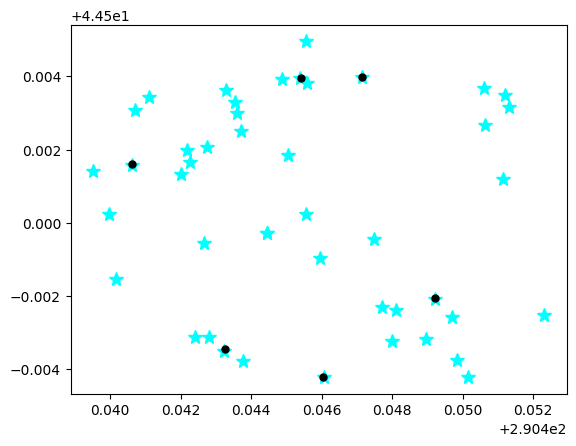

In [37]:
plt.plot(match['ra'], match['dec'],'k.',ms=10,label='TESS Input Catalog',zorder=5)
plt.plot(ps1['raMean'], ps1['decMean'],c='cyan',marker='*',ms=10,linestyle='',label='TIC Match',zorder=4)

In [31]:
match['ra']

290.449221147722
290.447139522317
290.445415244992
290.446049531422
290.443245115814
290.440620431327


In [32]:
match['ra2']

290.449212306874
290.4471395223169
290.44537445449555
290.4460536549599
290.44322156938165
290.4406096473192


In [47]:
match['GAIAmag']

18.5711
19.3959
19.5247
20.3477
16.893
19.2796
